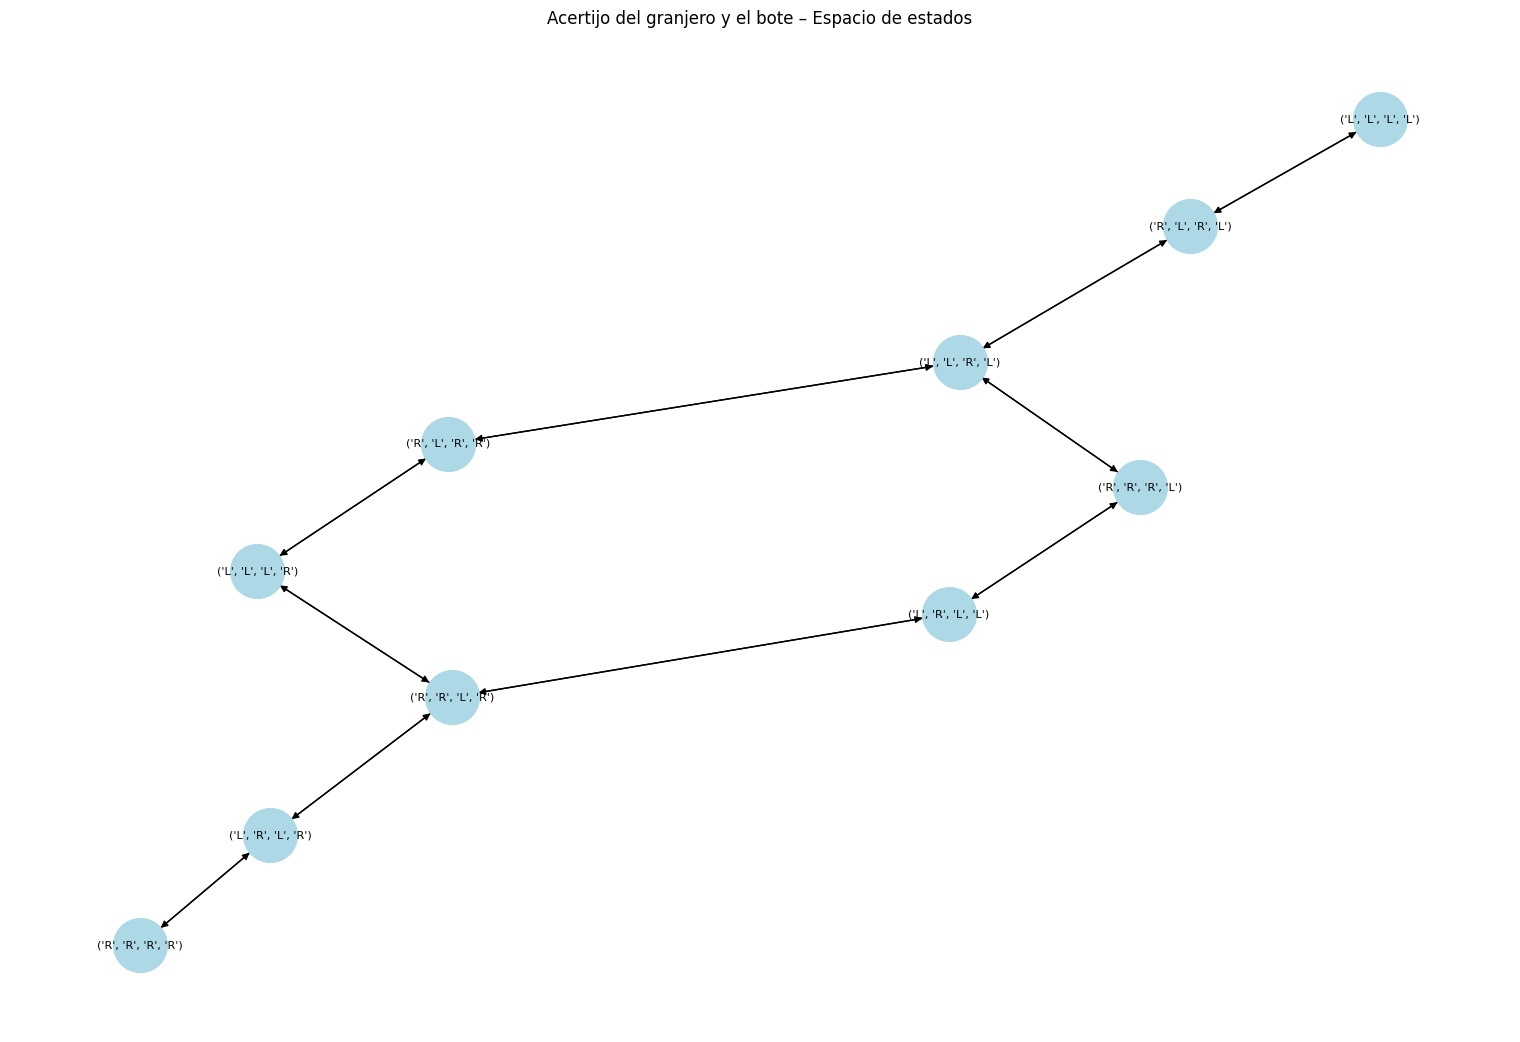

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

# Posiciones posibles
L = 'L'  # Izquierda
R = 'R'  # Derecha

# Todos los posibles estados
from itertools import product

def es_estado_valido(estado):
    G, W, Gt, C = estado # G=GRANJERO, W=LOBO, Gt=CABRA, C=COL
    if G != Gt and Gt == W:
        return False  # Lobo se come la cabra
    if G != Gt and Gt == C:
        return False  # Cabra se come la col
    return True

def movimientos_validos(estado):
    G, W, Gt, C = estado
    posibles = []

    # Mover solo el granjero
    nuevo_G = R if G == L else L
    candidatos = [(nuevo_G, W, Gt, C)]

    # Mover el granjero + otro objeto
    for i, item in enumerate([W, Gt, C]):
        if item == G:
            nuevo_item = nuevo_G
            nuevo_estado = list(estado)
            nuevo_estado[0] = nuevo_G
            nuevo_estado[i+1] = nuevo_item
            candidatos.append(tuple(nuevo_estado))

    # Filtrar solo estados válidos
    return [s for s in candidatos if es_estado_valido(s)]

# Construcción del grafo
Grafo = nx.DiGraph()
estados = list(product([L, R], repeat=4))
validos = [s for s in estados if es_estado_valido(s)]

# Añadir transiciones válidas
for estado in validos:
    for mov in movimientos_validos(estado):
        if mov in validos:
            Grafo.add_edge(estado, mov)

# Dibujar grafo
plt.figure(figsize=(15, 10))
pos = nx.spring_layout(Grafo, seed=42)
nx.draw(Grafo, pos, with_labels=True, node_size=1500, node_color='lightblue', font_size=8, arrows=True)
plt.title("Acertijo del granjero y el bote – Espacio de estados")
plt.show()